<img src="https://github.com/denisabrantes/pdk-use-cases/blob/main/images/hpe_logo.png?raw=true" alt="HPE Logo" width="250" style="align:left;margin-left:0;"/>

<h1>Finbert Prediction from KServe InferenceService</h1>

<b>Date: 08/15/23</b><br/>
<b>Version: 0.1</b><br/>
<b>Authors: HPE AI At Scale SE Team</b>

<img src="https://github.com/denisabrantes/pdk-use-cases/blob/main/images/platform_step0.png?raw=true" alt="Enterprise Machine Learning platform architecture" width="850">

<h3>Import modules and define functions</h3>
The cell below imports all modules and libraries required to run the demo.

In [1]:
# imports
import sys
import torch
import json
import uuid
import base64
import requests
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

<h2>Part 1: Use this code to load the sample .json files and generate predictions</h2>

In [2]:
# Define connection details for KServe InferenceService
model_name = "finbert"
ingress_host = "192.168.1.2"
ingress_port = "80"
service_hostname = "finbert-deploy.models.example.com"

In [3]:
with open("finbert_0.json", "r") as finfile:
    finjson = json.loads(finfile.read())

In [4]:
url = str("http://") + str(ingress_host) + ":" + str(ingress_port) + "/v1/models/" + str(model_name) + ":predict"
headers = {'Host': service_hostname}
payload = json.dumps(finjson)

In [5]:
label_list = ["positive", "negative", "neutral"]
response = requests.post(url, data=payload, headers=headers)
output = response.json()
pred_name = label_list[int(output["outputs"][0]["data"][0])]
print(pred_name)

negative


<h2>Part 2: Use this code to generate predictions from other json inputs</h2>

<h4>Step 1: Setting up connection details to KServe</h4>

In [6]:
# Define connection details for KServe InferenceService
model_name = "finbert"
ingress_host = "192.168.1.2"
ingress_port = "80"
service_hostname = "finbert-deploy.models.example.com"

<h4>Step 2: Defining text samples to submit to KServe</h4>

In [7]:
# define empty list to hold submissions
neg_text = []

# define string to create sentiment analysis for (NEGATIVE)
neg_text.append("Later that day Apple said it was revising down its earnings expectations in the fourth quarter of 2018, largely because of lower sales and signs of economic weakness in China.")

# define string to create sentiment analysis for (NEUTRAL)
neg_text.append("Bob van Dijk, CEO of Naspers and Prosus Group poses at Amsterdam's stock exchange, as Prosus begins trading on the Euronext stock exchange in Amsterdam, Netherlands, September 11, 2019 - REUTERS/Piroschka van de Wouw")

# define string to create sentiment analysis for (POSITIVE)
neg_text.append("Euronext had given an indicative price of 58.70 euros per share for Prosus, implying an increased market value of 95.3 billion euros ($105 billion) - The shares jumped up to 76 euros on opening and were trading at 75 euros at 0719 GMT.")

# define string to create sentiment analysis for (POSITIVE)
neg_text.append("Antonio Neri, CEO of HPE, said at the WEF in Davos, Switzerland, that HPE would deliver every product as a service by 2022, resulting in higher margins and more re-occuring revenue from cloud repatriation efforts.")


# print text that will be submitted
i = 0
for text in neg_text:
    print("TEXT #" + str(i+1) + " THAT WILL BE SUBMITTED: \n" + "="*31 + "\n" + str(text) + "\n")
    i+=1

TEXT #1 THAT WILL BE SUBMITTED: 
Later that day Apple said it was revising down its earnings expectations in the fourth quarter of 2018, largely because of lower sales and signs of economic weakness in China.

TEXT #2 THAT WILL BE SUBMITTED: 
Bob van Dijk, CEO of Naspers and Prosus Group poses at Amsterdam's stock exchange, as Prosus begins trading on the Euronext stock exchange in Amsterdam, Netherlands, September 11, 2019 - REUTERS/Piroschka van de Wouw

TEXT #3 THAT WILL BE SUBMITTED: 
Euronext had given an indicative price of 58.70 euros per share for Prosus, implying an increased market value of 95.3 billion euros ($105 billion) - The shares jumped up to 76 euros on opening and were trading at 75 euros at 0719 GMT.

TEXT #4 THAT WILL BE SUBMITTED: 
Antonio Neri, CEO of HPE, said at the WEF in Davos, Switzerland, that HPE would deliver every product as a service by 2022, resulting in higher margins and more re-occuring revenue from cloud repatriation efforts.



<h4>Step 3: Request prediction from KServe InferenceService</h4>

In [8]:
# Set url and headers for GRPC request
url = str("http://") + str(ingress_host) + ":" + str(ingress_port) + "/v1/models/" + str(model_name) + ":predict"
headers = {'Host': service_hostname}

# Define empty list for storing sentiments
sentiment = []


# Loop over the stored text in neg_text, predict class for each one
i = 0
for text in neg_text:

    # Create JSON payload for request
    request = {
      "inputs": [{
        "name": str(uuid.uuid4()),
        "shape": -1,
        "datatype": "BYTES",
        "data": text
      }]
    }
    
    # Dump request as JSON into payload
    payload = json.dumps(request)

    # Submit request, extract prediction in JSON, transform to Tensor
    response = requests.post(url, data=payload, headers=headers)

    # Extract predicted class and append to list
    output = response.json()
    sentiment.append(output["outputs"][0]["data"][0])

<h3>Step 4: Display predictions</h3>

In [9]:
# list of labels
label_list = ["positive", "negative", "neutral"]

# print result for every submission
i = 0
for pred in sentiment:
    print("Result #" + str(i+1) + "\n" + "="*31 + "\n" + "TEXT: " + str(neg_text[i]))
    print("SENTIMENT: " + label_list[int(sentiment[i])] + "\n")
    i+=1

Result #1
TEXT: Later that day Apple said it was revising down its earnings expectations in the fourth quarter of 2018, largely because of lower sales and signs of economic weakness in China.
SENTIMENT: negative

Result #2
TEXT: Bob van Dijk, CEO of Naspers and Prosus Group poses at Amsterdam's stock exchange, as Prosus begins trading on the Euronext stock exchange in Amsterdam, Netherlands, September 11, 2019 - REUTERS/Piroschka van de Wouw
SENTIMENT: neutral

Result #3
TEXT: Euronext had given an indicative price of 58.70 euros per share for Prosus, implying an increased market value of 95.3 billion euros ($105 billion) - The shares jumped up to 76 euros on opening and were trading at 75 euros at 0719 GMT.
SENTIMENT: positive

Result #4
TEXT: Antonio Neri, CEO of HPE, said at the WEF in Davos, Switzerland, that HPE would deliver every product as a service by 2022, resulting in higher margins and more re-occuring revenue from cloud repatriation efforts.
SENTIMENT: positive



<Axes: title={'center': 'Sentiment predictions FSI'}>

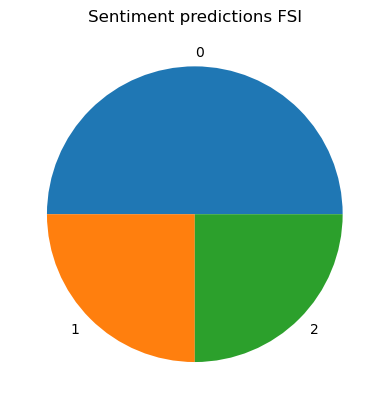

In [10]:
# create pd.dataframe for visualization
df_sentiment = pd.DataFrame(sentiment)
df_sentiment.columns = ["sentiment"]
df_sentiment.loc[df_sentiment["sentiment"] == "0", "sentiment"] = "positive"
df_sentiment.loc[df_sentiment["sentiment"] == "1", "sentiment"] = "negative"
df_sentiment.loc[df_sentiment["sentiment"] == "2", "sentiment"] = "neutral"

# print plot
df_sentiment["sentiment"].value_counts().plot(kind="pie", title="Sentiment predictions FSI", ylabel="")